## Exploratory Data Analysis (EDA)

### 1.  on your understanding of the data, what kind of business is this company in?

Solution: 

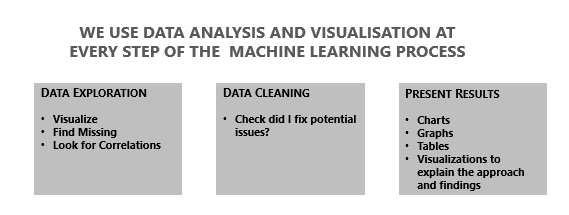

In [1]:
from IPython.display import Image
Image("/kaggle/input/online-retail-socgen/workflow.PNG")

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import pandas_profiling as pp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import iplot

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/kaggle/input/online-retail-socgen/workflow.PNG
/kaggle/input/online-retail-socgen/OnlineRetail.csv


In [3]:
Data=pd.read_csv("/kaggle/input/online-retail-socgen/OnlineRetail.csv", encoding='iso-8859-1' )
Data.shape

(541909, 8)

In [4]:
Data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
for k in Data.columns:
    print(k,Data[k].nunique())
    
Data.head()

InvoiceNo 25900
StockCode 4070
Description 4223
Quantity 722
InvoiceDate 23260
UnitPrice 1630
CustomerID 4372
Country 38


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
Data['InvoiceNo'] = Data['InvoiceNo'].astype(str)
Data['StockCode'] = Data['StockCode'].astype(str)
Data['Description'] = Data['Description'].astype(str)
Data['InvoiceDate'] = pd.to_datetime(Data['InvoiceDate'])
Data['CustomerID'] = Data['CustomerID'].astype(str)
Data['Country'] = Data['Country'].astype(str)

In [8]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


In [9]:
report = pp.ProfileReport(Data)
report.to_file("report.html")

report

In [10]:
Country_Quantity = pd.pivot_table(Data, values='Quantity', index=[Data['InvoiceDate'].dt.year], columns=['Country'], aggfunc=np.sum)
Country_Quantity

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Hong Kong,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
InvoiceDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,454.0,3.0,54.0,1755.0,NaN,NaN,80.0,917.0,NaN,454.0,5381.0,NaN,1254.0,4978.0,6723.0,NaN,NaN,319.0,-56.0,293.0,4093.0,NaN,652.0,NaN,6811.0,3582.0,140.0,945.0,NaN,NaN,NaN,867.0,3714.0,714.0,NaN,NaN,298101.0,NaN
2011,83199.0,4824.0,206.0,21397.0,356.0,2763.0,9399.0,5400.0,592.0,7734.0,137256.0,497.0,9412.0,105502.0,110725.0,1556.0,4769.0,2139.0,4409.0,7706.0,21125.0,386.0,NaN,944.0,193317.0,15665.0,3513.0,15235.0,352.0,75.0,5234.0,25957.0,31923.0,29611.0,1034.0,982.0,3965728.0,3300.0


In [11]:
Country_Quantity = pd.pivot_table(Data, values='Quantity', index=[Data['InvoiceDate'].dt.year,Data['InvoiceDate'].dt.month], columns=['Country'], aggfunc=np.sum)
Country_Quantity

Country                  Australia  Austria  Bahrain  Belgium  Brazil  Canada  Channel Islands  Cyprus  Czech Republic  Denmark     EIRE  European Community  Finland   France  Germany  Greece  Hong Kong  Iceland  Israel   Italy   Japan  Lebanon  Lithuania  Malta  Netherlands  Norway  Poland  Portugal    RSA  Saudi Arabia  Singapore   Spain  Sweden  Switzerland     USA  United Arab Emirates  United Kingdom  Unspecified
InvoiceDate InvoiceDate                                                                                                                                                                                                                                                                                                                                                                                                              
2010        1                107.0      NaN      NaN      NaN     NaN     NaN              NaN     NaN             NaN      NaN    243.0                 NaN      NaN    449.0    117.0     NaN        NaN      NaN     NaN     NaN     NaN      NaN        NaN    NaN         97.0  1852.0     NaN       NaN    NaN           NaN        NaN     NaN     NaN          NaN     NaN                   NaN         23949.0          NaN
            2                  NaN      NaN      NaN      NaN     NaN     NaN              NaN     NaN             NaN      NaN      4.0                 NaN      NaN      NaN    146.0     NaN        NaN      NaN     NaN     NaN     NaN      NaN        NaN    NaN          NaN     NaN     NaN       NaN    NaN           NaN        NaN     NaN     NaN          NaN     NaN                   NaN         20873.0          NaN
            3                  NaN      NaN      NaN    528.0     NaN     NaN              NaN     NaN             NaN      NaN   2575.0                 NaN      NaN    239.0    170.0     NaN        NaN      NaN     NaN   164.0     NaN      NaN        NaN    NaN          NaN     NaN   140.0      65.0    NaN           NaN        NaN   400.0     NaN        110.0     NaN                   NaN         10439.0          NaN
            5                  NaN      NaN      NaN      NaN     NaN     NaN              NaN     NaN             NaN      NaN      NaN                 NaN      NaN    611.0   1362.0     NaN        NaN      NaN     NaN     NaN   196.0      NaN      622.0    NaN          NaN     NaN     NaN       NaN    NaN           NaN        NaN     NaN     NaN          NaN     NaN                   NaN         13604.0          NaN
            6                  NaN      NaN      NaN      NaN     NaN     NaN              NaN     NaN             NaN      NaN    614.0                 NaN      NaN      NaN     85.0     NaN        NaN      NaN     NaN    -2.0     NaN      NaN        NaN    NaN          NaN     NaN     NaN      53.0    NaN           NaN        NaN     NaN     NaN          NaN     NaN                   NaN         20669.0          NaN
            7                  NaN      NaN      NaN      NaN     NaN     NaN              NaN     NaN             NaN      NaN      NaN                 NaN      NaN    752.0    155.0     NaN        NaN    319.0     NaN     NaN     NaN      NaN        NaN    NaN          NaN     NaN     NaN       NaN    NaN           NaN        NaN     NaN     NaN          NaN     NaN                   NaN         23769.0          NaN
            8                214.0      NaN      NaN      NaN     NaN     NaN              NaN     NaN             NaN      NaN      NaN                 NaN      NaN    121.0    136.0     NaN        NaN      NaN     NaN     NaN     NaN      NaN       30.0    NaN          NaN  1730.0     NaN     424.0    NaN           NaN        NaN     NaN     NaN          NaN     NaN                   NaN         20086.0          NaN
            9                  NaN      NaN      NaN      NaN     NaN     NaN             80.0     NaN             NaN    454.0    287.0                 NaN      NaN   1012.0    380.0     NaN        NaN